<a href="https://colab.research.google.com/github/TyapkinaPA/-/blob/main/06_hw_visualization_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
!pip install seaborn==0.11.0

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [ ]:
if colab:
    df = pd.read_csv('/content/StudentsPerformance[1].csv')
else:
    df = pd.read_csv("/content/StudentsPerformance[1].csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


In [ ]:
def plot_distribution(df, exam_name):
    plt.figure(figsize=(10, 6))
    sns.distplot(df[exam_name], kde=False, bins=10)
    plt.title(f"Результат экзамена {exam_name}")
    plt.ylim([0, len(df)])
    plt.xlim([np.min(df[exam_name]), np.max(df[exam_name]) + 1])
    plt.xticks(np.arange(0, len(plt.yticks()), 1))
    plt.show()

# Разделите ваш DataFrame на обучающую и тестовую выборку
df_train = df[:int(len(df) * 0.8)]
df_test = df[int(len(df) * 0.8):]


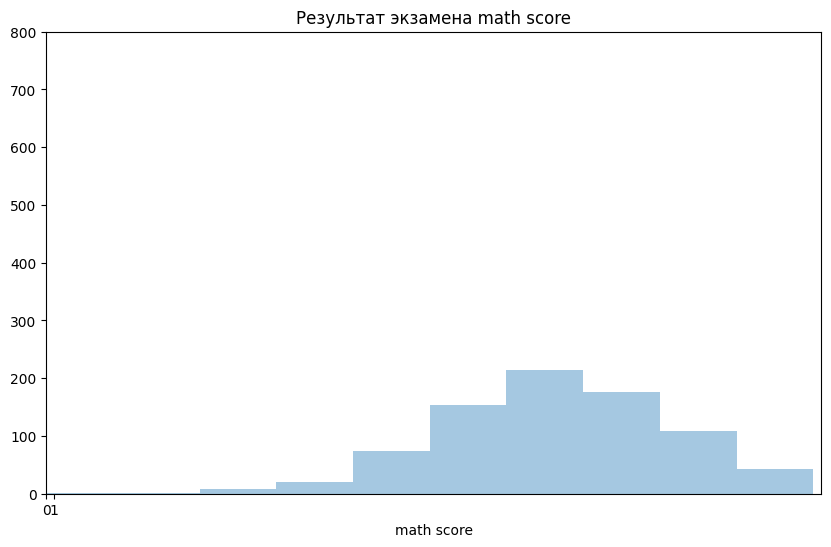

Медианное значение для math score: 66.0


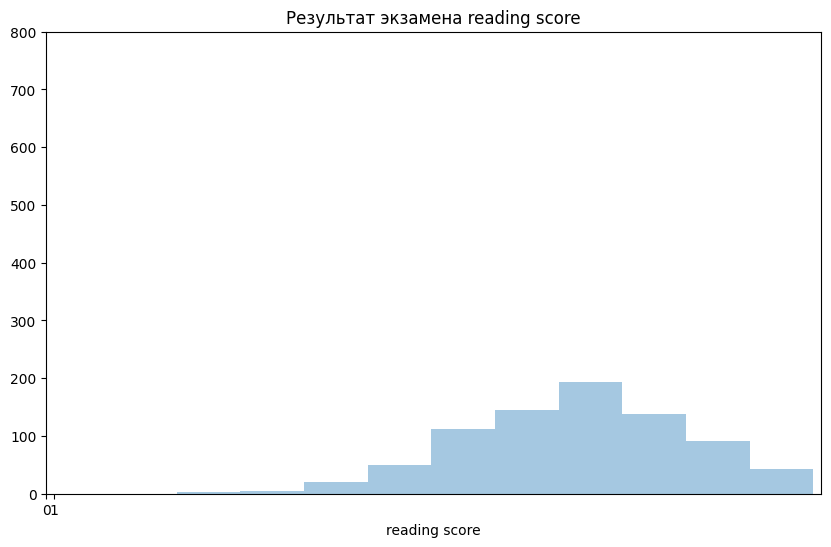

Медианное значение для reading score: 70.0


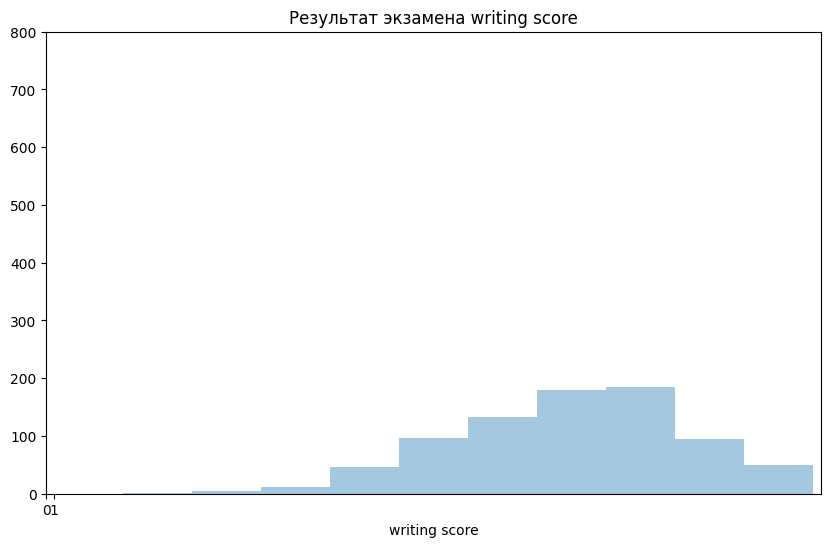

Медианное значение для writing score: 69.0


In [ ]:
# Список экзаменов
exams = ['math score', 'reading score', 'writing score']

# Постройте графики для каждого экзамена и посчитайте медианное значение
for exam in exams:
    plot_distribution(df_train, exam)
    median = np.median(df_train[exam])
    print(f"Медианное значение для {exam}: {median}")

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


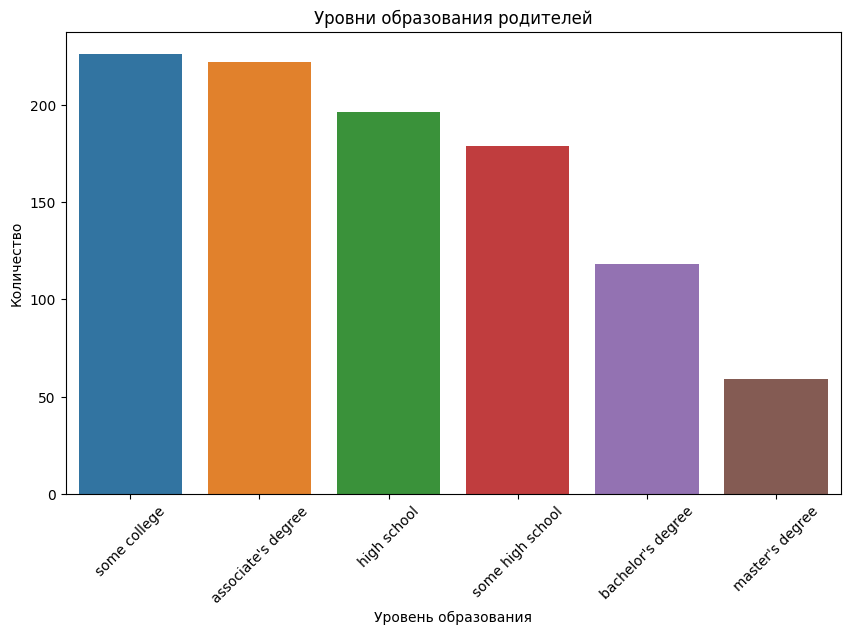

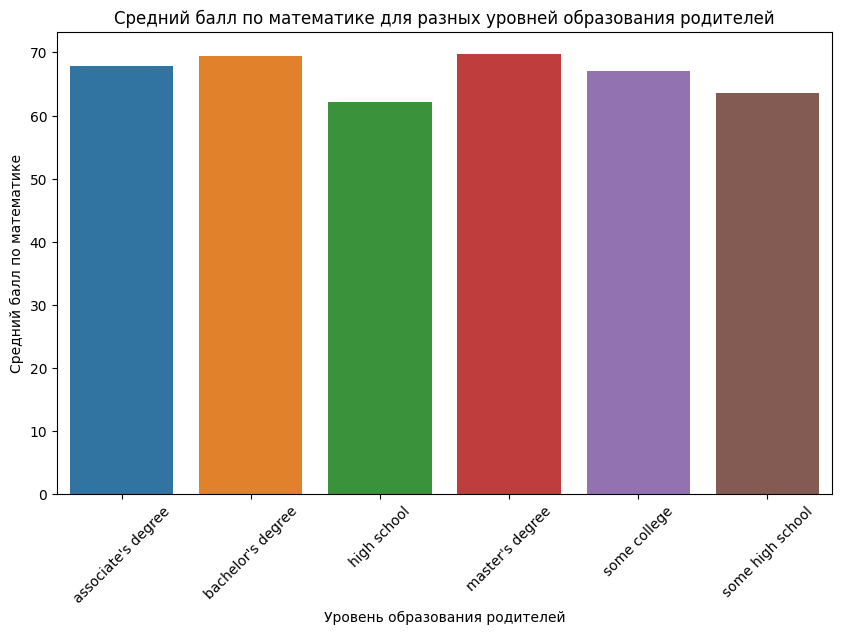

In [ ]:
education_levels = df['parental level of education'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=education_levels.index, y=education_levels.values)
plt.title('Уровни образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Группировка данных по уровню образования родителей и расчет среднего балла по математике
mean_scores = df.groupby('parental level of education')['math score'].mean()

# Построение графика сравнения баллов по математике
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Средний балл по математике для разных уровней образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Средний балл по математике')
plt.xticks(rotation=45)
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
count_female_students = len(df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)])
print("Число студенток, набравших больше 90 баллов по всем предметам:", count_female_students)

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
score_comparison = df.groupby('gender').agg({'math score':['min', 'max', 'median'], 'reading score':['min', 'max', 'median'], 'writing score':['min', 'max', 'median']})
print("Сравнение баллов у студентов разных полов:")
print(score_comparison)

Сравнение баллов у студентов разных полов:
       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [ ]:
result = df.groupby(["gender", "lunch"]).agg({"math score": "mean" , 'reading score': 'mean', 'writing score': 'mean'})

print(result)

                     math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

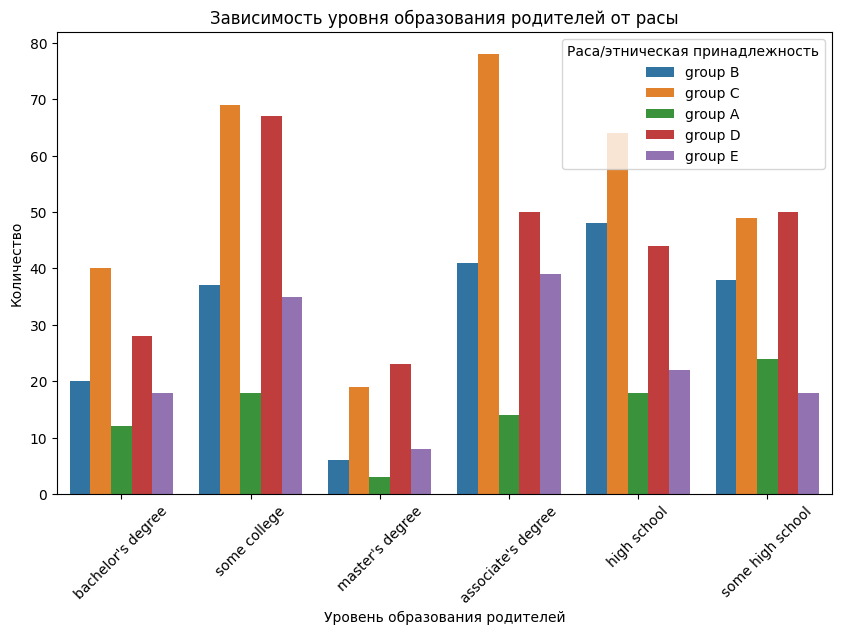

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)
plt.title('Зависимость уровня образования родителей от расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Раса/этническая принадлежность')
plt.xticks(rotation=45)
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

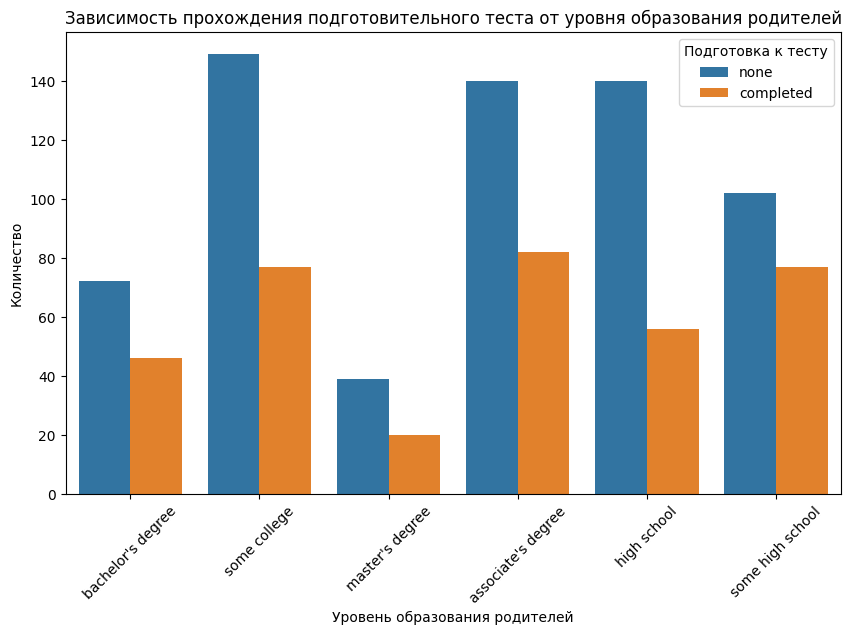

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Подготовка к тесту')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

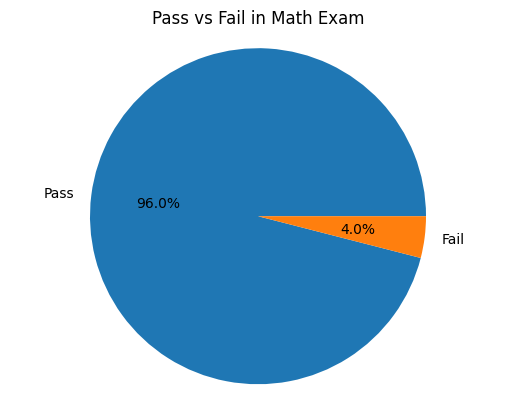

In [ ]:
# Создание столбца с результатом сдачи экзамена по математике
df["Pass_math"] = df["math score"].apply(lambda x: "Pass" if x >= 40 else "Fail")

# Создание графика pie
pass_counts = df["Pass_math"].value_counts()
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%')
plt.title("Pass vs Fail in Math Exam")
plt.axis('equal')  # делает круг круглым
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

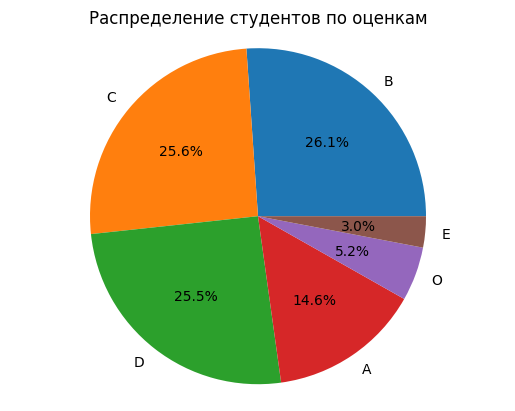

In [ ]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3

# Определение категорий оценок
def assign_grade(average_score):
    if average_score < 40:
        return 'E'
    elif average_score < 60:
        return 'D'
    elif average_score < 70:
        return 'C'
    elif average_score < 80:
        return 'B'
    elif average_score < 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df['average score'].apply(assign_grade)

# Создание pie chart
grade_counts = df['grade'].value_counts()

plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')
plt.title('Распределение студентов по оценкам')
plt.axis('equal')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В